In [1]:
import pandas as pd
import numpy as np

In [2]:
# requests_9292 = pd.read_csv("C:\\Users\\Sumeet Zankar\\Downloads\\DEIA-1\\9292\\PNB_Verzoeken.csv")

# #requests_9292_mini = requests_9292.sample(frac=0.1)
# ### 9292 REQUESTS COLUMNS ### (LOG OF ALL REQUESTS MADE ON THE 9292 APP IN NOVEMBER 2019)
# # QUESTION_TULP_ID : Unique Identifier
# # Opvraag datum : Request Date
# # Gewenste reis datum : Desired Travel Date
# # Opvraag tijd uur : Query time Hours
# # Gewenste vertrek tijd uur : Desried Departure Time Hours
# # Halteclusternummer begin reis : Stop Cluster Number Start Journey
# # Halteclusternummer eind reis : Stop Cluster Number End Journey
# # Haltenaam begin reis : Stop Name Begin Journey
# # Haltenaam eind reis : Stop Name End Journey

In [3]:
# advices_9292 = pd.read_csv("C:\\Users\\Sumeet Zankar\\Downloads\\DEIA-1\\9292\\PNB_Adviezen.csv")

# bus_9292 = advices_9292[advices_9292['Modaliteit']=='Bus']
# #advices_9292_mini = advices_9292.sample(frac=0.1)
# ### 9292 ADVICES COLUMNS ### (LOG OF ALL ADVICES GENERATED ON EACH OF THE PREVIOUS REQUESTS)
# # QUESTION_TULP_ID : Unique Request Identifier
# # Lag nummer : Lay number
# # Lijn : Line
# # Modaliteitsnummer : Modality Number
# # Haltenummer van rit : Stop Number of Trip
# # Haltenummer naar rit : Stop Number to Trip
# # Reistijd lag : Travel Time 
# # Startdatum lag : Start Date
# # Starttijd lag : Start Time
# # Haltenaam van rit : Stop Name of trip - Origin
# # Haltenaam naar rit : Stop Name to trip - Destination
# # Modaliteit : Modality
# # Modaliteit Detail : Modality Detail

In [4]:
# arriva_passenger_data = pd.read_csv("C:\\Users\\Sumeet Zankar\\Downloads\\DEIA-1\\bus data\\Bus_OD_data_WestOostBrabant_2019_11.csv",sep=';')
# #arriva_passenger_data_mini = arriva_passenger_data.sample(frac=0.1)
# ### ARRIVA PASSENGER DATA COLUMNS ### (ACTUAL BUS CHECK-IN NUMBERS FOR ALL BUSES THROUGH NOVEMBER 2019)
# # Exploitatiedatum : Operating Date
# # Concessie : Concession
# # Lijnnummer : Line Number
# # Station Herkomst : Origin Station
# # Station : Current Station
# # Totaal : Total Occupancy

In [5]:
# arriva_line_information = pd.read_csv("C:\\Users\\Sumeet Zankar\\Downloads\\DEIA-1\\bus data\\lijnnummer_koppeling.csv",sep=';')

# ### BUS LINE INFORMATION COLUMNS ### (EXTRA INFORMATION ON EACH BUS LINE NUMBER)
# # Concessie : Concession
# # InternLijnnummer : Internal Line Number (Used by arriva)
# # PublieksLijnnummer : Public Line Number (Visible to the public and on 9292 app)
# # Omschrijving : Description
# # Type : Bus Line Type

In [6]:
# arriva_haltes = pd.read_csv("C:\\Users\\Sumeet Zankar\\Downloads\\DEIA-1\\bus data\\Arriva_Haltes.csv",sep=';')

# ### BUS STOP LOCATIONS ### (EXTRA INFORMATION ON EACH BUS STOP)

In [12]:
#for start_date in advices_9292['Startdatum_lag'].unique():
#advices_9292[(advices_9292['Startdatum_lag']=='2019-10-29')&(advices_9292['Modaliteit']=='Bus')]['Starttijd_lag']

In [245]:
# arriva_passenger_data.insert(loc=1,column='Day',value=pd.Series(pd.DatetimeIndex(arriva_passenger_data['Exploitatiedatum'])).dt.day_name())
# #del arriva_passenger_data['Exploitatiedatum']
# #arriva_passenger_data.index.dt.day_name 
# arriva_passenger_data.insert(loc=1,column='Day_num',value=pd.Series(pd.DatetimeIndex(arriva_passenger_data['Exploitatiedatum'])).dt.dayofweek)
# arriva_passenger_data.insert(loc=2,column='Source Station',value=pd.Series([arriva_haltes[arriva_haltes['Arriva_FARESTOPSHORTDESCRIPTION']==elem][['CHB_Haltenaam']].values for elem in arriva_passenger_data['Station Herkomst']]))
# arriva_passenger_data.insert(loc=3,column='Destination Station',value=pd.Series([arriva_haltes[arriva_haltes['Arriva_FARESTOPSHORTDESCRIPTION']==elem][['CHB_Haltenaam']].values for elem in arriva_passenger_data['Station']]))


In [112]:
#[pd.Series([arriva_haltes[arriva_haltes['Arriva_FARESTOPSHORTDESCRIPTION']==elem][['CHB_Haltenaam']].values]) for elem in arriva_passenger_data['Station Herkomst']]

In [560]:
# arriva_passenger_data

,Exploitatiedatum,Day_num,Date,Day,Concessie,Source Station,Destination Station,Lijnnummer,Station Herkomst,Station,Totaal
0,1-11-2019,4,2019-01-11,Friday,Oost-Brabant,"[[Geffen, Hanenberg]]","[['S-Hertogenbosch, Aartshertogenlaan]]",90,Gfn Hanenberg,Ht Aartshertoge,3
1,1-11-2019,4,2019-01-11,Friday,Oost-Brabant,"[[Geffen, Hanenberg]]","[['S-Hertogenbosch, Centraal Station]]",90,Gfn Hanenberg,Ht Busstation,7
2,1-11-2019,4,2019-01-11,Friday,Oost-Brabant,"[[Geffen, Hanenberg]]","[['S-Hertogenbosch, Stadion]]",90,Gfn Hanenberg,Ht Stadion,2
3,1-11-2019,4,2019-01-11,Friday,Oost-Brabant,"[[Geffen, Hanenberg]]","[[Schaijk, Europaplein]]",90,Gfn Hanenberg,Sch Europaplein,1
4,1-11-2019,4,2019-01-11,Friday,Oost-Brabant,"[[Geffen, Papendijk]]","[[Grave, Busstation]]",90,Gfn Papendijk,Grv Busstation,1
...,...,...,...,...,...,...,...,...,...,...,...
528808,30-11-2019,5,2019-11-30,Saturday,West-Brabant,"[[Breda, Centraal Station]]","[[Rijsbergen, Burg. Gommersstraat]]",855,Bd Station,Rsb Gommerstraat,1
528809,30-11-2019,5,2019-11-30,Saturday,West-Brabant,"[[Breda, Centraal Station]]","[[Rijsbergen, Koningin Julianastraat]]",855,Bd Station,Rsb Julianastr,1
528810,30-11-2019,5,2019-11-30,Saturday,West-Brabant,"[[Breda, Centraal Station]]","[[Zundert, Berkenlaan]]",855,Bd Station,Znr Berkenlaan,6
528811,30-11-2019,5,2019-11-30,Saturday,West-Brabant,"[[Breda, Centraal Station]]","[[Zundert, W. Passtoorsstraat]]",855,Bd Station,Znr Passtoorstr,2


In [474]:
# arriva_cleaned = arriva_passenger_data[['Exploitatiedatum','Date','Day_num','Source Station','Destination Station','Totaal']]
# arriva_cleaned['Source Station']=[str(elem) for elem in arriva_cleaned['Source Station']]
# arriva_cleaned['Source Station']=[elem[3:-3] for elem in arriva_cleaned['Source Station']]
# arriva_cleaned['Destination Station']=[str(elem) for elem in arriva_cleaned['Destination Station']]
# arriva_cleaned['Destination Station']=[elem[3:-3] for elem in arriva_cleaned['Destination Station']]
# arriva_cleaned.replace("",np.nan,inplace=True)
# arriva_cleaned = arriva_cleaned.dropna()

In [271]:
#arriva_cleaned['Source Station'][0][3:-3]


In [475]:
# arriva_cleaned.to_pickle("C:\\Users\\Sumeet Zankar\\Downloads\\DEIA-1\\bus data\\arriva_cleaned")

In [591]:
# arriva_cleaned[arriva_cleaned['Totaal']>600]

,Exploitatiedatum,Day_num,Source Station,Destination Station,Totaal
5751,1-11-2019,4,"Tilburg, Centraal Station","Tilburg, Stappegoor/IJsbaan",1326
5753,1-11-2019,4,"Tilburg, Stappegoor/IJsbaan","Tilburg, Centraal Station",1120
44069,4-11-2019,3,"Tilburg, Centraal Station","Tilburg, Stappegoor/IJsbaan",1193
44071,4-11-2019,3,"Tilburg, Stappegoor/IJsbaan","Tilburg, Centraal Station",1141
48717,4-11-2019,3,"Breda, Biesdonkweg","Breda, Centraal Station",641
...,...,...,...,...,...
480955,28-11-2019,3,"Tilburg, Centraal Station","Tilburg, Stappegoor/IJsbaan",1592
480957,28-11-2019,3,"Tilburg, Stappegoor/IJsbaan","Tilburg, Centraal Station",1527
494515,28-11-2019,3,"Breda, Hogeschoollaan","Breda, Centraal Station",610
502821,29-11-2019,4,"Tilburg, Centraal Station","Tilburg, Stappegoor/IJsbaan",1315


In [558]:
# arriva_cleaned[arriva_cleaned['Source Station'].str.contains('Station ','station ')]['Source Station'].unique()

array(["'S-Hertogenbosch, Station Oost", 'Tilburg, Station Reeshof',
       'Tilburg, Station Universiteit'], dtype=object)

In [575]:
# stops = ["'s-Hertogenbosch, Onderwijsboulevard",
# "'S-Hertogenbosch, Centraal Station",
# "Tilburg, Centraal Station",
# "Tilburg, Stappegoor/IJsbaan",
# "Breda, Centraal Station",
# "Breda, Hogeschoollaan",
# "Breda, Biesdonkweg"]


In [577]:
# import matplotlib.pyplot as plt

# def plot_trip_byweekday(source,destination):

#     trip_data = arriva_cleaned[(arriva_cleaned['Source Station']==source)&(arriva_cleaned['Destination Station']==destination)]
#     #trip_data.plot(x='Day_num',y='Totaal',kind='scatter',title=source+' to '+destination)    
#     agg_trip = arriva_cleaned[(arriva_cleaned['Source Station']==source)&(arriva_cleaned['Destination Station']==destination)].groupby(['Day_num']).mean()
#     agg_trip = agg_trip.reset_index()


#     plt.scatter([elem for elem in trip_data['Day_num'].astype(int).values],[elem for elem in trip_data['Totaal'].astype(int).values],c='b')
#     plt.plot([elem for elem in agg_trip['Day_num'].astype(int).values],[elem for elem in agg_trip['Totaal'].astype(int).values],c='r',label='Mean')
#     plt.xticks(agg_trip['Day_num'],[elem for elem in ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']])
#     plt.xlabel('Day')
#     plt.ylabel('Trip Occupancy')
#     plt.legend(loc='best')
#     plt.title(source+' to '+destination)



# def plot_trip_bydate(source,destination):

#     trip_data = arriva_cleaned[(arriva_cleaned['Source Station']==source)&(arriva_cleaned['Destination Station']==destination)]
#     #trip_data.plot(x='Day_num',y='Totaal',kind='scatter',title=source+' to '+destination
#     agg_trip = arriva_cleaned[(arriva_cleaned['Source Station']==source)&(arriva_cleaned['Destination Station']==destination)].groupby(['Exploitatiedatum']).mean()
#     agg_trip = agg_trip.reset_index()

#     plt.figure(num=None, figsize=(30, 6), dpi=100, facecolor='w', edgecolor='k')
#     plt.scatter([elem for elem in trip_data['Exploitatiedatum'].values],[elem for elem in trip_data['Totaal'].astype(int).values],c='b')
#     plt.scatter([elem for elem in agg_trip['Exploitatiedatum'].values],[elem for elem in agg_trip['Totaal'].astype(int).values],c='r',label='Mean')

#     plt.xticks(agg_trip['Exploitatiedatum'],[elem[:4] for elem in agg_trip['Exploitatiedatum']])
#     plt.xlabel('Date')
#     plt.ylabel('Trip Occupancy')

#     plt.legend(loc='best')
#     plt.title(source+' to '+destination)    
    

(None, None)

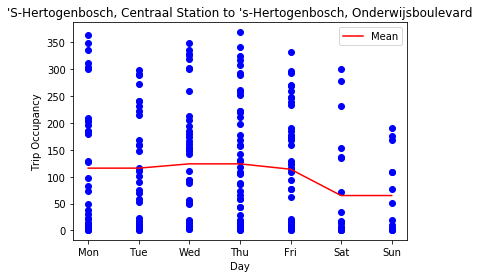

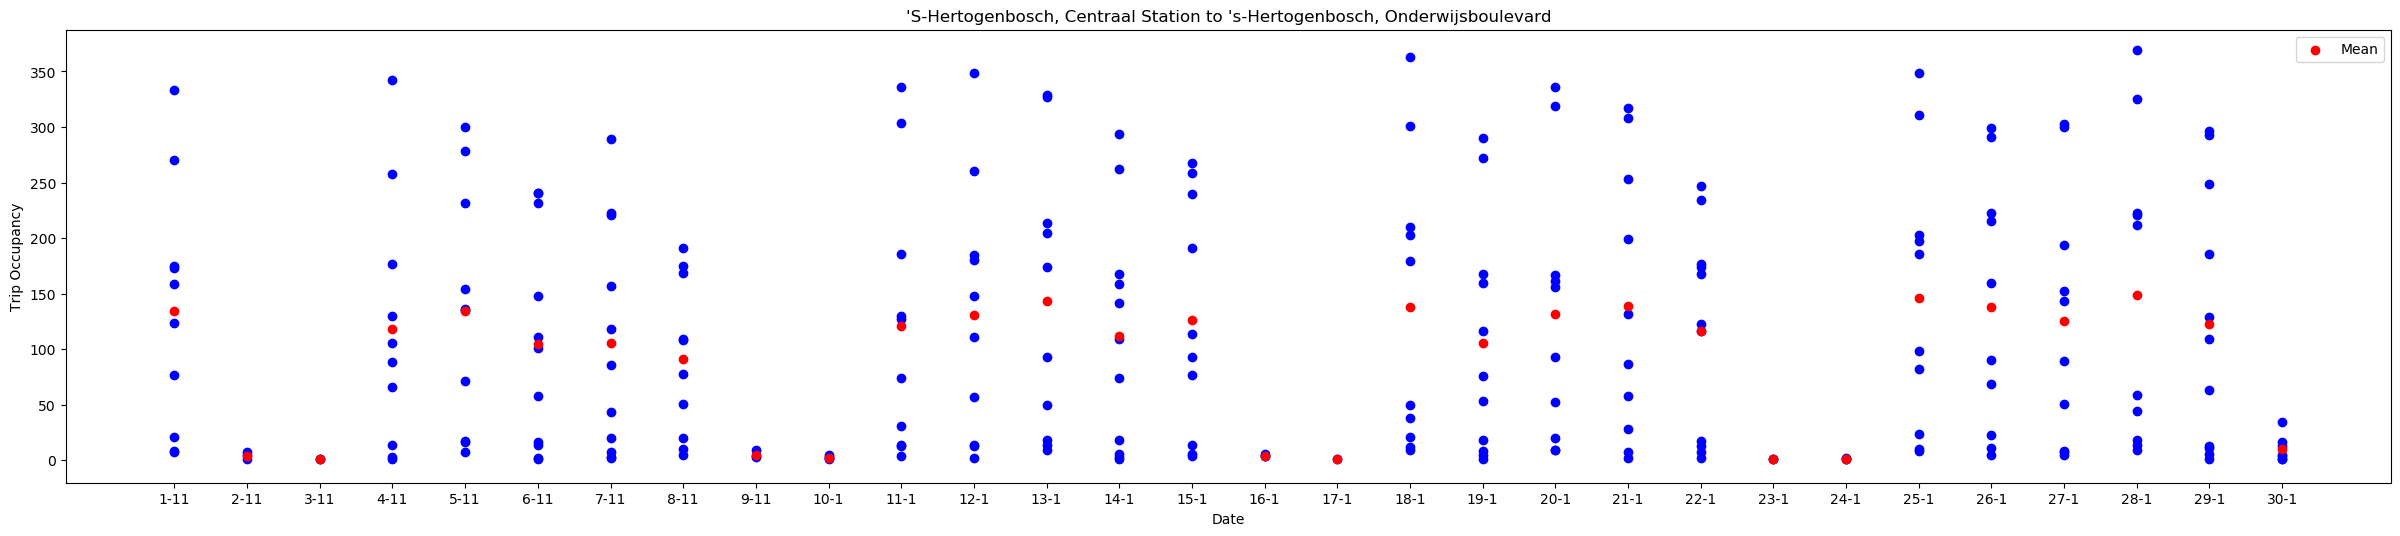

In [578]:
# plot_trip_byweekday(stops[1],stops[0]),plot_trip_bydate(stops[1],stops[0])

(None, None)

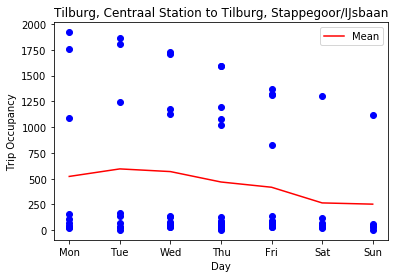

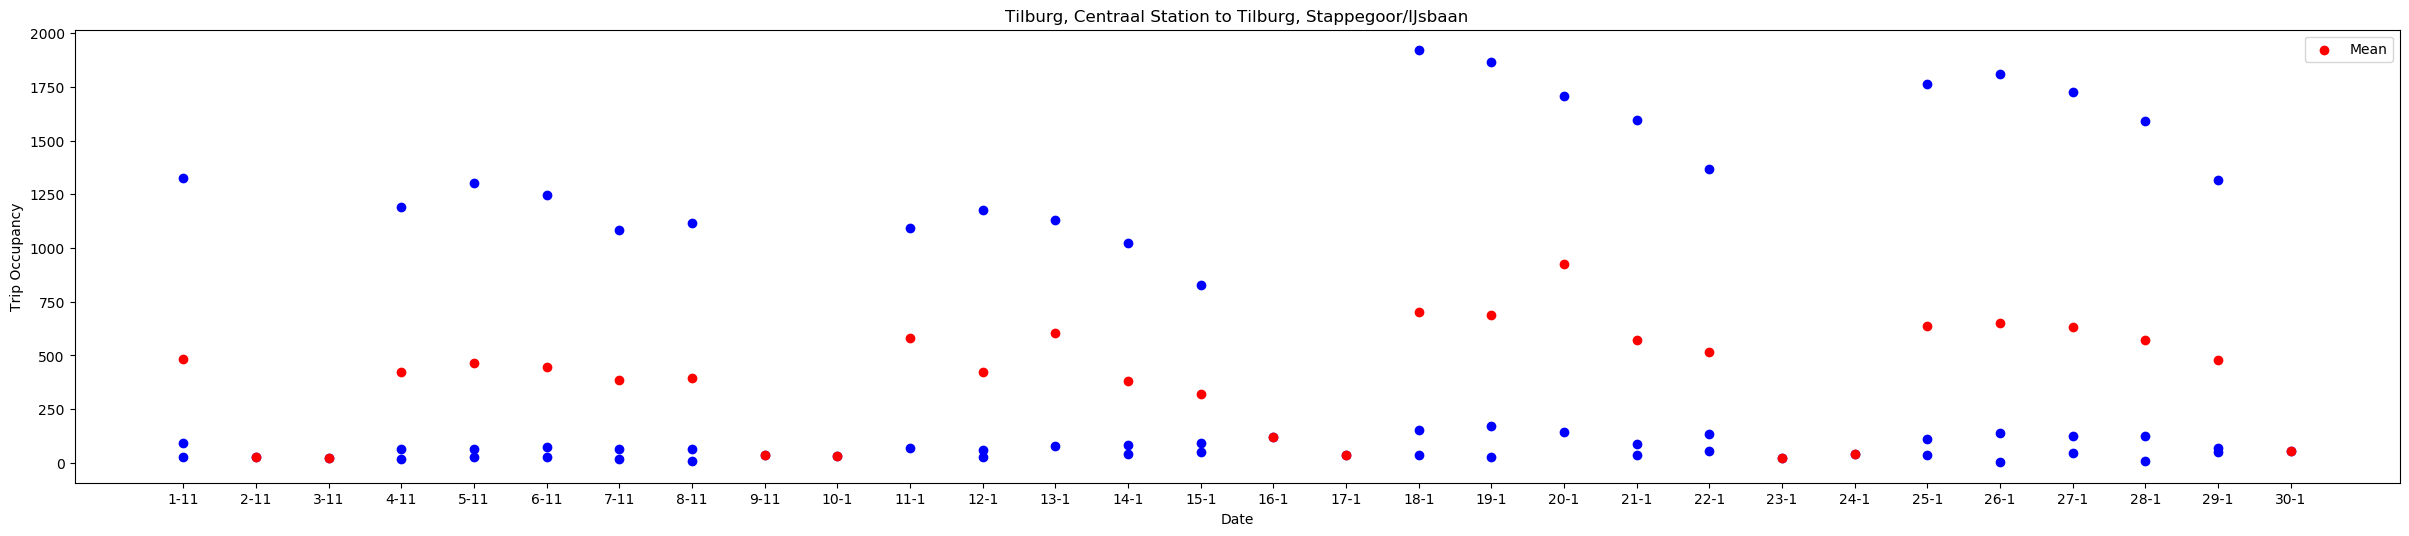

In [579]:
# plot_trip_byweekday(stops[2],stops[3]),plot_trip_bydate(stops[2],stops[3])

(None, None)

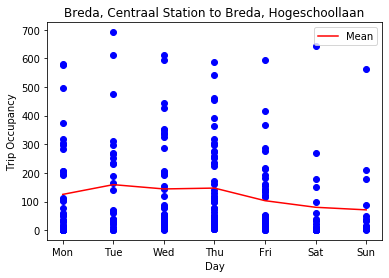

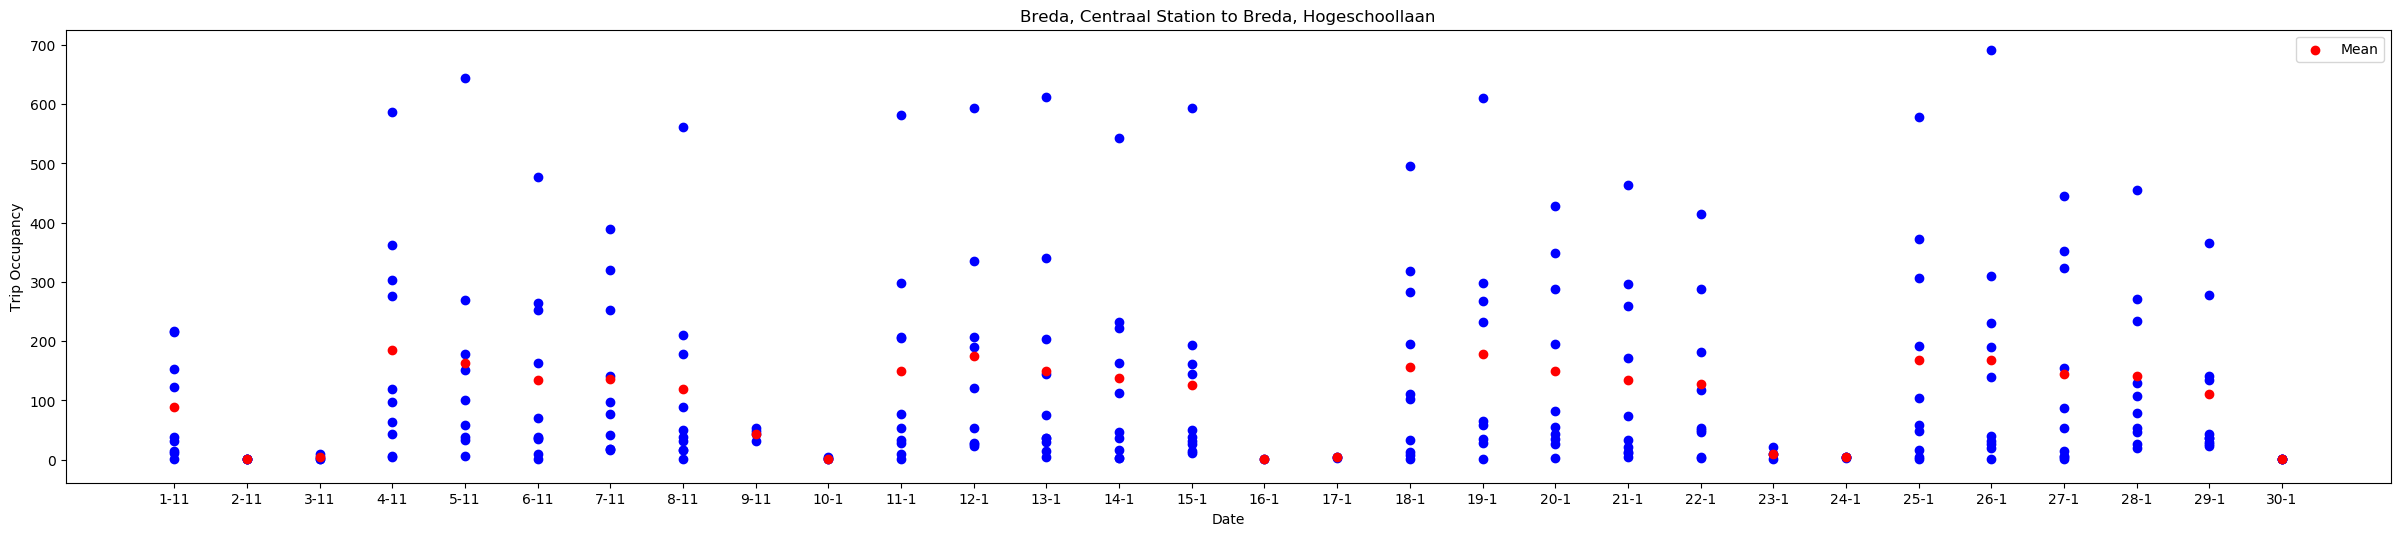

In [581]:
# plot_trip_byweekday(stops[4],stops[5]),plot_trip_bydate(stops[4],stops[5])

(None, None)

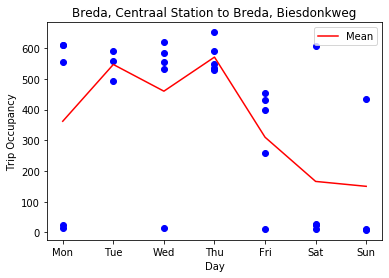

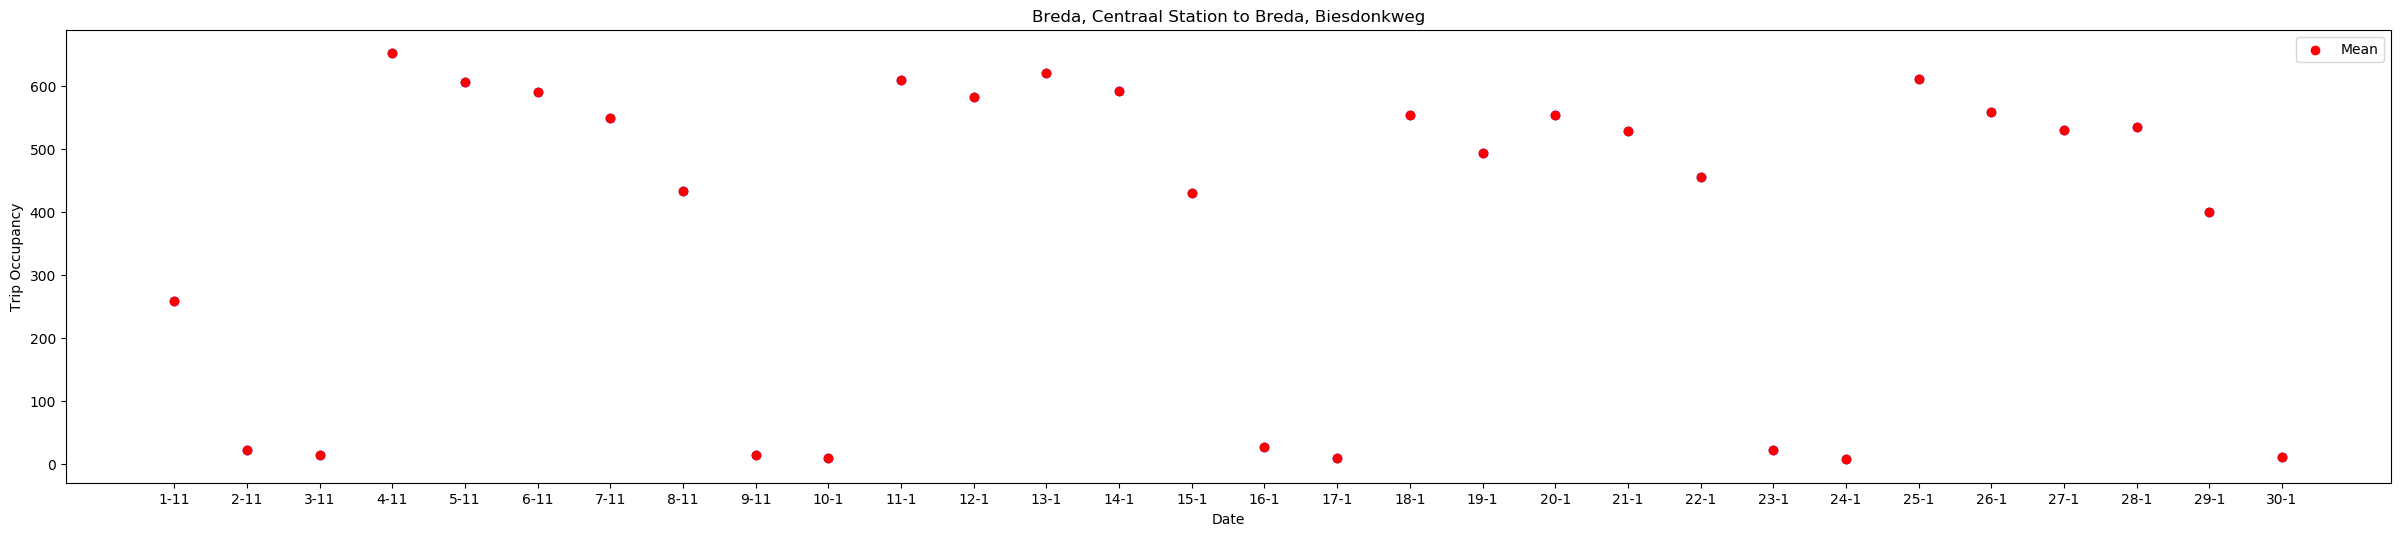

In [580]:
# plot_trip_byweekday(stops[4],stops[6])

In [669]:
# arriva_cleaned

,Exploitatiedatum,Day_num,Source Station,Destination Station,Totaal
0,1-11-2019,4,"Geffen, Hanenberg","'S-Hertogenbosch, Aartshertogenlaan",3
1,1-11-2019,4,"Geffen, Hanenberg","'S-Hertogenbosch, Centraal Station",7
2,1-11-2019,4,"Geffen, Hanenberg","'S-Hertogenbosch, Stadion",2
3,1-11-2019,4,"Geffen, Hanenberg","Schaijk, Europaplein",1
4,1-11-2019,4,"Geffen, Papendijk","Grave, Busstation",1
...,...,...,...,...,...
528807,30-11-2019,5,"Breda, Centraal Station","Effen, Effen",1
528808,30-11-2019,5,"Breda, Centraal Station","Rijsbergen, Burg. Gommersstraat",1
528809,30-11-2019,5,"Breda, Centraal Station","Rijsbergen, Koningin Julianastraat",1
528810,30-11-2019,5,"Breda, Centraal Station","Zundert, Berkenlaan",6


In [2]:
import pandas as pd
# preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit

# models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neural_network import MLPRegressor

#pipelines
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer


In [681]:
arriva_cleaned = pd.read_pickle("C:\\Users\\Sumeet Zankar\\Downloads\\DEIA-1\\bus data\\arriva_cleaned")
y = arriva_cleaned[['Totaal']]
X = arriva_cleaned[['Day_num','Source Station','Destination Station']]
X_s, _ , y_s, _ = train_test_split(X,y,train_size=0.05,shuffle=True,random_state=1)
categorical_features = ['Day_num','Source Station','Destination Station']
numerical_features = []

In [684]:
#define regressor pipeline function
def regressor_pipeline(estimator):
    
    # Creating a pipeline with one-hot-encoder for categorical data 
    categoric_transformer = make_pipeline(OneHotEncoder(sparse=False,handle_unknown='ignore'))

    # Creating a pipeline with mean imputer for numerical data 
    #numeric_transformer =  make_pipeline(StandardScaler())  
    
    # Combining both pipelines such that each pipeline works on the columns it was meant for
    preprocessor = make_column_transformer((categoric_transformer,categorical_features)
     )

    # Return the complete pipeline containing preprocessing-piepline and the estimator/classifier
    return Pipeline(steps = [('prep',preprocessor),('est',estimator)])


In [686]:
# define 4 regression models to evaluate
models = {'linear_regressor': regressor_pipeline(LinearRegression(n_jobs=-1)).fit(X_s,y_s) ,
            'neural_net_regressor': regressor_pipeline(MLPRegressor(random_state=1)).fit(X_s,y_s),
            #'svm_regressor': regressor_pipeline(SVR()).fit(X_s,y_s),
            'rf_regressor': regressor_pipeline(RandomForestRegressor(n_estimators=500,random_state=1)).fit(X_s,y_s)}


results = {'linear_regressor':[],
                'neural_net_regressor':[],
                #'svm_regressor':[],
                'rf_regressor':[] 
          }



In [ ]:
for (model_name,model_pipe) in models.items():
    #index=0
    for metric in ['neg_mean_absolute_error','neg_mean_squared_error','r2']:
        
        results[model_name].append(np.mean(cross_validate(model_pipe,X, y, scoring=metric,cv=ShuffleSplit(n_splits=3,random_state=1),    return_train_score=False)['test_score']))  
        #index += 1
#res = pd.DataFrame(index=['neg_mean_absolute_error','neg_mean_squared_error','r2'],columns=results.keys).from_dict(data=results)
res = pd.DataFrame(data=results)
res['metrics'] = pd.Series(['mae','mse','r2'])

print(res)


In [595]:
# bus_request_counts = bus_9292[['Startdatum_lag','Starttijd_lag','Haltenaam_van_rit','Haltenaam_naar_rit']].groupby(['Startdatum_lag','Haltenaam_van_rit','Haltenaam_naar_rit']).count()
# bus_request_counts.columns = pd.Index(['Request Counts'])
# bus_request_counts.reset_index(inplace=True)

In [624]:
# bus_request_counts[bus_request_counts['Request Counts']>300]

,Startdatum_lag,Haltenaam_van_rit,Haltenaam_naar_rit,Request Counts
4489,2019-11-01,"station , Breda","Centrum , Breda",304
6985,2019-11-02,"Station , Eindhoven","Zuiderklamp , Nuenen",330
12268,2019-11-04,"Centrum , Etten-Leur","Station , Etten-Leur",381
15737,2019-11-04,"station , Breda","Hogeschoollaan , Breda",565
21694,2019-11-06,"Centrum , Etten-Leur","Station , Etten-Leur",368
24698,2019-11-06,"station , Breda","Hogeschoollaan , Breda",366
25986,2019-11-07,"Centrum , Etten-Leur","Station , Etten-Leur",325
29404,2019-11-07,"station , Breda","Hogeschoollaan , Breda",412
42867,2019-11-11,"Centrum , Etten-Leur","Station , Etten-Leur",344
46524,2019-11-11,"station , Breda","Hogeschoollaan , Breda",400


In [637]:
# df_haltes = pd.DataFrame(   
#                             set(bus_request_counts.Haltenaam_van_rit.unique())
#                             .union(set(bus_request_counts.Haltenaam_naar_rit.unique()))
#                             )

# df_haltes.columns = ['9292_halte']
# df_haltes

,9292_halte
0,"Arnold Kaldenbachstraat , Zutphen"
1,"Moskeeplein , Utrecht"
2,"Heiakker , Deurne"
3,"Zweins , Zweins"
4,"De Druif , Klundert"
...,...
11171,"Spieringweg , Cruquius"
11172,"De Savornin Lohmansingel , Gouda"
11173,"Vaarselstraat , Someren"
11174,"Het Slyk , Vianen"


In [651]:
# df_haltes[df_haltes['9292_halte'].str.contains('Centraal Station')]

,9292_halte
323,"Centraal Station halte HH , Rotterdam"
2679,"Centraal Station (perron B) , Dordrecht"
3242,"Centraal Station , Amsterdam"
3501,"Centraal Station , s-Gravenhage"
5441,"Centraal Station , Arnhem"
5456,"Centraal Station , Hengelo"
5894,"Centraal Station , Almelo"
6162,"Centraal Station , Oss"
6955,"Centraal Station , Enschede"
8917,"Centraal Station (A) , Tilburg"


In [663]:
# [str(arriva_haltes[ (arriva_haltes['CHB_quayNaam'].str.contains(elem.split()[0]) ) &
#                 (arriva_haltes['CHB_plaats'].str.contains(elem.split()[-1]) )
#               ]['CHB_Haltenaam'].unique())[2:-2] for elem in df_haltes['9292_halte']]



# #[e[-1] for e in elem.split() ]

error: missing ), unterminated subpattern at position 11

In [662]:
str(arriva_haltes[ (arriva_haltes['CHB_quayNaam'].str.contains('Centraal Station') ) &
                (arriva_haltes['CHB_plaats'].str.contains('Tilburg') )
              ]['CHB_Haltenaam'].unique())[2:-2]

'Tilburg, Centraal Station'

,halte
0,"Arnold Kaldenbachstraat , Zutphen"
1,"Moskeeplein , Utrecht"
2,"Heiakker , Deurne"
3,"Zweins , Zweins"
4,"De Druif , Klundert"
...,...
11171,"Spieringweg , Cruquius"
11172,"De Savornin Lohmansingel , Gouda"
11173,"Vaarselstraat , Someren"
11174,"Het Slyk , Vianen"


In [176]:
# arriva_haltes['CHB_Haltenaam']=arriva_haltes['CHB_Haltenaam'].str.lower()

In [107]:
# arriva_haltes[arriva_haltes['CHB_plaats'].str.contains('airport')]

,Arriva_FARESTOPSHORTDESCRIPTION,CHB_Haltenaam,afstand,Arriva_CODE,Arriva_FARESTOPSHORTNAME,Arriva_IDFVFARESTOP,Arriva_WGS_COORD_LAT,Arriva_WGS_COORD_LON,CHB_quayNaam,CHB_straat,CHB_plaats


In [190]:
# df_haltes[df_haltes['halte'].str.contains('Tilburg')]

,halte
198,"Alpenlaan , Tilburg"
208,"Oudenstaart , Tilburg"
264,"Hoevensekanaaldijk , Tilburg"
273,"Prof.v. Buchemlaan , Tilburg"
315,"Kempenbaan , Tilburg"
...,...
10950,"Arriva , Tilburg"
11024,"Lage Witsiebaan , Tilburg"
11065,"Lourdesstraat , Tilburg"
11086,"Westerpark , Tilburg"


In [ ]:
### MVP: 
# Given the day of the week, and the source and destination stop, product will predict expected bus occupancy for your trip.


### Target Variable : Bus Occupancy

### Input Variables:
### Day (Constructed from Date)
### Hour 
### Source Stop
### Destination Stop
### 


### MVP: 
## To Generate Value from 9292 request_advice data (+ arriva passenger data)


In [18]:
# all_unique_source_stops = np.unique(bus_passenger_data['Station Herkomst'])

In [19]:
# all_unique_stops = np.unique(bus_passenger_data['Station'])